# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use Score/Rating. A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.




In [101]:
import nltk
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns              
from nltk import FreqDist
#nltk.download('stopwords') # run this one time

In [102]:
#import spacy
#import gensim
#from gensim import corpora

In [103]:
import os
#os.chdir('C:\\Users\\Administrator\\Desktop\\Data\\reviews_Automotive_5.json')
os.chdir('C:\\Users\\prudi\\Desktop\\Data Sets\\amazon-fine-food-reviews')
#df = pd.read_json('Reviews.json', lines=True)
df=pd.read_csv('Reviews.csv')

In [104]:
df.loc[df['ProductId'] == 'B000HDOPZG',:].head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
73779,73780,B000HDOPZG,ANHNUHKI585T7,L. Hirsch,14,14,5,1278374400,Irresistable!,"My husband and I just looked at each other after eating one of the lemon wafer cookies and sighed. The flavor is pure deep natural lemon, tart and bright, with a sweet creamy finish--nothing like..."
73780,73781,B000HDOPZG,AQFTBJZPVNMAH,Hippo,7,7,4,1254960000,Tasty & Addictive,"It is a very tasty treat I enjoy with my afternoon coffee. However, all good things must be had in moderation, and hence I will only buy one pack at a time from the local store.<br />However the p..."


In [105]:
df.loc[df['ProductId'] == 'B000HDL1RQ',:]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
78433,78434,B000HDL1RQ,ANHNUHKI585T7,L. Hirsch,14,14,5,1278374400,Irresistable!,"My husband and I just looked at each other after eating one of the lemon wafer cookies and sighed. The flavor is pure deep natural lemon, tart and bright, with a sweet creamy finish--nothing like..."
78434,78435,B000HDL1RQ,AQFTBJZPVNMAH,Hippo,7,7,4,1254960000,Tasty & Addictive,"It is a very tasty treat I enjoy with my afternoon coffee. However, all good things must be had in moderation, and hence I will only buy one pack at a time from the local store.<br />However the p..."
78435,78436,B000HDL1RQ,A2G2DXPFZKG48W,Audio Maven,6,6,5,1204070400,Great tasting snack,These are the greatest wafer type cookies I have ever eaten. I've also tried the lemon ones which are out of this world as well. They are wafer type but are cut into small cubes (ideal for snack s...
78436,78437,B000HDL1RQ,AL1DVFEY7X5VR,Always Snackin',5,5,5,1199923200,Can't eat just one!,ALL I CAN SAY IS OMG!THESE LITTLE TREATS ARE SO ADDICTIVE AND ONLY HAVE 10 GRAMS OF SUGAR IN NINE WAFERS!THESE ARE BY FAR THE BEST TASTING WAFER COOKIES I HAVE EVER HAD AND IF IT WERE NOT FOR ME B...
78437,78438,B000HDL1RQ,A2F64XFMO5ELL6,Rod B,3,3,4,1260489600,Quadratini Lemon are great!,"My wife loves these little wafers, but our local stores no longer carry them. Amazon to the rescue! Great product, fast shipping. We are very happy and will continue to order these."
78438,78439,B000HDL1RQ,A16SDTBEKKFN2Z,M. White,2,2,5,1336521600,delicious,delicious hazel nut taste in a cunchy bite- size wafer cookie. highly recommended. will buy these again.remind me of the hazel nut coffee creamer
78439,78440,B000HDL1RQ,AI47WBE7PHESF,J. Collins,2,2,5,1278720000,Punch of lemon flavor,These Loacker Quadratini Lemon Wafers are the best I've tasted. They are natural with a real lemon 'punch' in every bite. Plus they are not overly sweet like some other wafer brands. I will defini...
78440,78441,B000HDL1RQ,ALT34F4DUTJ8Z,Sassy08,2,2,5,1278288000,Bet you can't eat just one!,"Previously, these lemon wafer cookies were sold at Wal Mart; however, they no longer carry them. Recently, I discovered that Trader Joe's carried a chocolate version and I inquired if they carrie..."
78441,78442,B000HDL1RQ,A3BIN78AJ0D4JO,"MrsDiehl ""MrsDiehl""",2,2,5,1272067200,Special treat,I tried this product at a friend's house and had to get some for myself. I was delighted to find them on Amazon for half the price listed on another so called wholesale site. These make a great ...
78442,78443,B000HDL1RQ,AKFGO1HY01B85,L. Botez,2,2,5,1270598400,Yum,I love these cookies! what can I say. They are worth buying in bulk! Yum. Bet you can't eat just one.


In [106]:
#Sorting data according to ProductId in ascending order
sorted_data=df.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [107]:
#Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(393933, 10)

In [108]:
sorted_data[sorted_data.duplicated(['UserId','ProfileName',"Time","Text"])].shape

(174521, 10)

In [109]:
final.shape

(393933, 10)

In [110]:
final=final.reset_index()

In [111]:
final=final.loc[:100,:]

In [112]:
def partition(x):
    if x < 3:
        return 0
    return 1

#changing reviews with score less than 3 to be positive and vice-versa
actualScore = final['Score']
positiveNegative = actualScore.map(partition) 
final['Score'] = positiveNegative
print("Number of data points in our data", final.shape)
final.head(3)

Number of data points in our data (101, 11)


,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,1,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of roses all begin<br />to droop<br />I pepped them up<br />with chicken soup!<br />Sprinkle once<br />sprinkle twice<br />sprinkle chicken soup<br />with ...
1,150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their months of the year! We will learn all of the poems throughout the school year. they like the handmotions which I invent for each poem.
2,150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks se..."


In [113]:
from nltk.corpus import stopwords
Stopwords=stopwords.words('english')

In [114]:
for i in range(len(final['Text'])):
    words=nltk.word_tokenize(final['Text'][i])
    withoutstopwords=[word for word in words if word not in Stopwords]
    final['Text'][i]=' '.join(withoutstopwords)

C:\Users\prudi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [115]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
## Remove the special characters
final['Text'] = final['Text'].str.replace("[^a-zA-Z0-9]+", " ")

In [116]:
# remove urls from text python: https://stackoverflow.com/a/40823105/4084039
## Remove the URL'S
import re
final['Text']=final['Text'].apply(lambda x: re.sub(r"http\S+", " ", x))

In [117]:
from nltk.stem import PorterStemmer
Stemmer=PorterStemmer()
for i in range(len(final['Text'])):
    tokens=nltk.word_tokenize(final['Text'][i])
    stem_tokens=[Stemmer.stem(token) for token in tokens]
    final['Text'][i]=' '.join(stem_tokens)

C:\Users\prudi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [118]:
# https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element
## Remove xml tags from the reviews
from bs4 import BeautifulSoup
final['Text']=final['Text'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

In [119]:
# remove short words (length < 3)
final['Text'] = final['Text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [120]:
# make entire text lowercase
final['Text'] = [r.lower() for r in final['Text']]

In [121]:
final.head(1)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,1,1108425600,"Nice cadence, catchy rhymes",june saw charm group rose begin droop pep chicken soup sprinkl sprinkl twice sprinkl chicken soup rice thi great book teach children month year the repetit phrase funni littl stori accompani pictu...


# printing some random reviews
sent_0 = final['Text'].values[0]
print(sent_0)
print("="*50)

sent_1000 = final['Text'].values[10]
print(sent_1000)
print("="*50)

sent_1500 = final['Text'].values[20]
print(sent_1500)
print("="*50)

sent_4900 = final['Text'].values[30]
print(sent_4900)
print("="*50)

In [122]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "cannot", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [123]:
final['Text']=final['Text'].map(decontracted)

In [124]:
#remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
final['Text']=final['Text'].apply(lambda x: re.sub("\S*\d\S*", "", x))

In [125]:
final.head(2)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,1,1108425600,"Nice cadence, catchy rhymes",june saw charm group rose begin droop pep chicken soup sprinkl sprinkl twice sprinkl chicken soup rice thi great book teach children month year the repetit phrase funni littl stori accompani pictu...
1,150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,thi fun way children learn month year learn poem throughout school year like handmot invent poem


In [126]:
#remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
import re
sent_0 = re.sub("\S*\d\S*", " ", "This are number 123")
print(sent_0)

This are number  


In [127]:
final.head(1)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,1,1108425600,"Nice cadence, catchy rhymes",june saw charm group rose begin droop pep chicken soup sprinkl sprinkl twice sprinkl chicken soup rice thi great book teach children month year the repetit phrase funni littl stori accompani pictu...


In [128]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentence in tqdm(final['Text'].values):
    words=nltk.word_tokenize(sentence)
    wordswithoutstopwords=[]
    for word in words:
        if word not in Stopwords:
            wordswithoutstopwords.append(word)
    sentence='  '.join(wordswithoutstopwords)
    sentence = re.sub(r"http\S+", "", sentence)
    sentence = BeautifulSoup(sentence, 'lxml').get_text()
    sentence = decontracted(sentence)
    sentence = re.sub("\S*\d\S*", "", sentence).strip()
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)
    # https://gist.github.com/sebleier/554280
    sentence = ' '.join(e.lower() for e in sentence.split() if e.lower() not in Stopwords)
    preprocessed_reviews.append(sentence.strip())
preprocessed_reviews

100%|███████████████████████████████████████████████████████████████████████████████| 101/101 [00:00<00:00, 695.98it/s]


['june saw charm group rose begin droop pep chicken soup sprinkl sprinkl twice sprinkl chicken soup rice thi great book teach children month year repetit phrase funni littl stori accompani pictur make ideal bedtim read thi nearli good sendak book like wild thing pierr boy care still carri uniqu brand charm',
 'thi fun way children learn month year learn poem throughout school year like handmot invent poem',
 'grew read sendak book watch realli rosi movi incorpor love son love howev miss hard cover version paperback seem kind flimsi take two hand keep page open',
 'get movi sound track sing along carol king thi great stuff whole extend famili know song heart qualiti kid storytel music',
 'entertain rhyme stori cleaver catchi illustr imagin fit right howev paperback somewhat small flimsi opt bigger edit',
 'thi grand daughter favorit book read love rhythm cute stori actual enjoy read',
 'thi copi smaller expect mostli pay attent list dimens book mauric sendak wonder littl book month rhym

In [129]:
final['Text']=preprocessed_reviews

<h2><font color='red'>[3.2] Preprocessing Review Summary</font></h2>

In [130]:
final.head(2)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,1,1108425600,"Nice cadence, catchy rhymes",june saw charm group rose begin droop pep chicken soup sprinkl sprinkl twice sprinkl chicken soup rice thi great book teach children month year repetit phrase funni littl stori accompani pictur ma...
1,150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,thi fun way children learn month year learn poem throughout school year like handmot invent poem


In [31]:
## Similartly you can do preprocessing for review summary also.

# [4] Featurization

## [4.1] BAG OF WORDS

In [39]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    return words_df

In [136]:
all_words=' '.join(x for x in final['Text'])
all_words=all_words.split()
fdist = FreqDist(all_words)
for f in fdist:
    fdist[f]=0
BOW=[]

In [137]:
fdist

FreqDist({'june': 0, 'saw': 0, 'charm': 0, 'group': 0, 'rose': 0, 'begin': 0, 'droop': 0, 'pep': 0, 'chicken': 0, 'soup': 0, ...})

In [139]:
BOW=[]
for x in final['Text']:
    fdist_actual=fdist.copy()
    words=nltk.word_tokenize(x)
    for w in words:
        if w in fdist_actual.keys():
            fdist_actual[w]=1
    BOW.append(fdist_actual)
BOW_final=pd.DataFrame(BOW)

In [140]:
BOW

[FreqDist({'june': 1, 'saw': 1, 'charm': 1, 'group': 1, 'rose': 1, 'begin': 1, 'droop': 1, 'pep': 1, 'chicken': 1, 'soup': 1, ...}),
 FreqDist({'thi': 1, 'children': 1, 'month': 1, 'year': 1, 'like': 1, 'fun': 1, 'way': 1, 'learn': 1, 'poem': 1, 'throughout': 1, ...}),
 FreqDist({'book': 1, 'read': 1, 'sendak': 1, 'grew': 1, 'watch': 1, 'realli': 1, 'rosi': 1, 'movi': 1, 'incorpor': 1, 'love': 1, ...}),
 FreqDist({'thi': 1, 'great': 1, 'movi': 1, 'get': 1, 'sound': 1, 'track': 1, 'sing': 1, 'along': 1, 'carol': 1, 'king': 1, ...}),
 FreqDist({'stori': 1, 'howev': 1, 'paperback': 1, 'flimsi': 1, 'entertain': 1, 'rhyme': 1, 'cleaver': 1, 'catchi': 1, 'illustr': 1, 'imagin': 1, ...}),
 FreqDist({'thi': 1, 'book': 1, 'stori': 1, 'read': 1, 'love': 1, 'grand': 1, 'daughter': 1, 'favorit': 1, 'rhythm': 1, 'cute': 1, ...}),
 FreqDist({'soup': 1, 'thi': 1, 'book': 1, 'teach': 1, 'month': 1, 'year': 1, 'littl': 1, 'make': 1, 'read': 1, 'sendak': 1, ...}),
 FreqDist({'book': 1, 'teach': 1, 'chil

In [141]:
BOW_final.head(2)

,june,saw,charm,group,rose,begin,droop,pep,chicken,soup,...,unless,lowfat,burn,stick,chihuahua,pickiest,world,morn,wake,win
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(BOW_final, final['Score'],test_size=0.3,random_state=42)

In [41]:
print('Shape of X_train is',X_train.shape)
print('Shape of y_train is',y_train.shape)

print('*'*100)

print('Shape of X_test is',X_test.shape)
print('Shape of y_test is',y_test.shape)

Shape of X_train is (7, 201)
Shape of y_train is (7,)
****************************************************************************************************
Shape of X_test is (4, 201)
Shape of y_test is (4,)


In [42]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [43]:
## Predicting the values for the X_test
predicted_xtest=list(neigh.predict(X_test))
actual_test=list(y_test)

In [44]:
## Predicting the values for the X_train
predicted_xtrain=list(neigh.predict(X_train))
actual_train=list(y_train)

In [45]:
## Passing the first value from the X_train
Predicted_value_X_train=neigh.predict(X_train.iloc[:1,:])
print('Predicted value for the first record is ',Predicted_value_X_train)

Predicted value for the first record is  [1]


In [46]:
## Passing the first value from the X_test
Predicted_value_X_test=neigh.predict(X_test.iloc[:1,:])
print('Predicted value for the first record is ',Predicted_value_X_test)

Predicted value for the first record is  [1]


In [47]:
## Passing the first value from the X_test and Predicting the Probelities
Predicted_value_X_test=neigh.predict_proba(X_test.iloc[1:20,:])
print('Predicted value for the first record is \n',Predicted_value_X_test)

Predicted value for the first record is 
 [[1.]
 [1.]
 [1.]]


In [48]:
neigh.kneighbors(X_train.iloc[:1,:],return_distance=True)

(array([[0.        , 6.08276253, 6.244998  ]]),
 array([[0, 3, 1]], dtype=int64))

In [49]:
neigh.kneighbors(X_train.iloc[:1,:],return_distance=False)

array([[0, 3, 1]], dtype=int64)

In [50]:
print('Classes we have to predict ',neigh.classes_)

Classes we have to predict  [1]


In [51]:
# Confusion metrics for the Test data

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results =confusion_matrix(actual_test, predicted_xtest) 

print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual_test, predicted_xtest) )
print('Report : ')
print (classification_report(actual_test, predicted_xtest) )


Confusion Matrix :
[[0 1]
 [0 3]]
Accuracy Score : 0.75
Report : 


C:\Users\prudi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\prudi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\prudi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

   micro avg       0.75      0.75      0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



In [52]:
# Confusion metrics for the Test data

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results =confusion_matrix(actual_train, predicted_xtrain) 

print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual_train, predicted_xtrain) )
print('Report : ')
print (classification_report(actual_train, predicted_xtrain) )

Confusion Matrix :
[[7]]
Accuracy Score : 1.0
Report : 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7

   micro avg       1.00      1.00      1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [53]:
## Building KNN Model using BOW as the input parameter

## [4.2] COUNT VECTORIZER

In [425]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_df=0.95, min_df=2, max_features=None, stop_words='english',lowercase=True)
count_vect.fit(final['Text'])
final_counts = count_vect.transform(final['Text'])
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (1001, 2529)
the number of unique words  2529


In [426]:
count_vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [427]:
final_counts.toarray()[10]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
final_countvectorizer_df=pd.DataFrame(final_counts.toarray(),columns=count_vect.get_feature_names())

In [411]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_countvectorizer_df, final['Score'],test_size=0.3,random_state=42)

In [412]:
print('Shape of X_train is',X_train.shape)
print('Shape of y_train is',y_train.shape)

print('*'*100)

print('Shape of X_test is',X_test.shape)
print('Shape of y_test is',y_test.shape)

Shape of X_train is (700, 4811)
Shape of y_train is (700,)
****************************************************************************************************
Shape of X_test is (301, 4811)
Shape of y_test is (301,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

In [414]:
## Predicting the values for the X_test
predicted_xtest=list(neigh.predict(X_test))
actual_test=list(y_test)

In [415]:
## Predicting the values for the X_train
predicted_xtrain=list(neigh.predict(X_train))
actual_train=list(y_train)

In [416]:
## Passing the first value from the X_train
Predicted_value_X_train=neigh.predict(X_train.iloc[:1,:])
print('Predicted value for the first record is ',Predicted_value_X_train)

Predicted value for the first record is  [0]


In [417]:
## Passing the first value from the X_test
Predicted_value_X_test=neigh.predict(X_test.iloc[:1,:])
print('Predicted value for the first record is ',Predicted_value_X_test)

Predicted value for the first record is  [1]


In [418]:
## Passing the first value from the X_test and Predicting the Probelities
Predicted_value_X_test=neigh.predict_proba(X_test.iloc[1:20,:])
print('Predicted value for the first record is \n',Predicted_value_X_test)

Predicted value for the first record is 
 [[0.         1.        ]
 [0.         1.        ]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]]


In [419]:
neigh.kneighbors(X_train.iloc[:1,:],return_distance=True)

(array([[0.        , 9.        , 9.05538514]]),
 array([[  0, 522, 158]], dtype=int64))

In [420]:
neigh.kneighbors(X_train.iloc[:1,:],return_distance=False)

array([[  0, 522, 158]], dtype=int64)

In [421]:
print('Classes we have to predict ',neigh.classes_)

Classes we have to predict  [0 1]


In [422]:
# Confusion metrics for the Test data

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results =confusion_matrix(actual_test, predicted_xtest) 

print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual_test, predicted_xtest) )
print('Report : ')
print (classification_report(actual_test, predicted_xtest) )


Confusion Matrix :
[[  6  29]
 [  6 260]]
Accuracy Score : 0.8837209302325582
Report : 
              precision    recall  f1-score   support

           0       0.50      0.17      0.26        35
           1       0.90      0.98      0.94       266

   micro avg       0.88      0.88      0.88       301
   macro avg       0.70      0.57      0.60       301
weighted avg       0.85      0.88      0.86       301



In [423]:
# Confusion metrics for the Test data

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results =confusion_matrix(actual_train, predicted_xtrain) 

print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual_train, predicted_xtrain) )
print('Report : ')
print (classification_report(actual_train, predicted_xtrain) )

Confusion Matrix :
[[ 55  69]
 [ 10 566]]
Accuracy Score : 0.8871428571428571
Report : 
              precision    recall  f1-score   support

           0       0.85      0.44      0.58       124
           1       0.89      0.98      0.93       576

   micro avg       0.89      0.89      0.89       700
   macro avg       0.87      0.71      0.76       700
weighted avg       0.88      0.89      0.87       700



In [424]:
## Building KNN Model using BOW as the input parameter

In [400]:
## Additional code snippets to introduce you to the new

In [401]:
# Each word in the lexicon has scores for:
# 1)     polarity: negative vs. positive    (-1.0 => +1.0)
# 2) subjectivity: objective vs. subjective (+0.0 => +1.0)
# 3)    intensity: modifies next word?      (x0.5 => x2.0)
from textblob import TextBlob
text_1=TextBlob(df['Text'][10])
text_1.sentiment

Sentiment(polarity=0.20859375, subjectivity=0.6824776785714286)

In [402]:
# Spelling correction
from textblob import Word
w = Word('topped')
w.spellcheck()

[('topped', 1.0)]

In [403]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

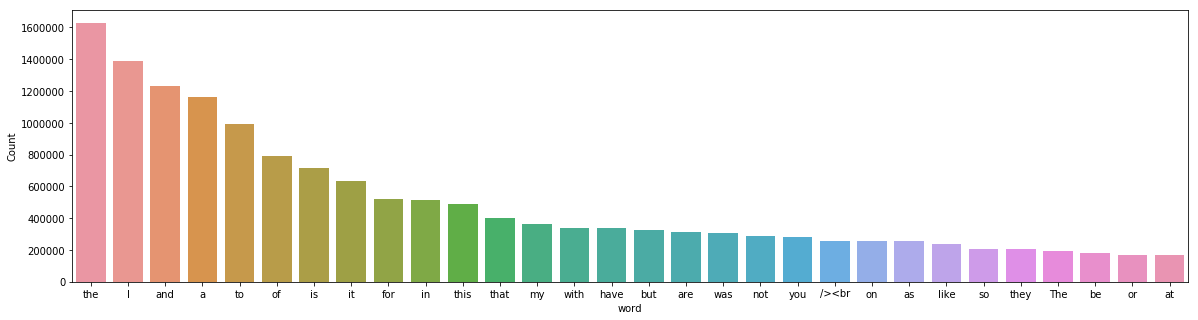

In [404]:
freq_words(df['Text'])

In [428]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 20

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['Text'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(df['Text'])
tf_feature_names = tf_vectorizer.get_feature_names()

print('Top columns \n',tf_feature_names)

pd.DataFrame(tf.toarray(),columns=tf_feature_names)

Top columns 
 ['amazon', 'br', 'buy', 'coffee', 'don', 'flavor', 'food', 'good', 'great', 'just', 'like', 'little', 'love', 'product', 'really', 'taste', 'tea', 'time', 'use', 've']


,amazon,br,buy,coffee,don,flavor,food,good,great,just,like,little,love,product,really,taste,tea,time,use,ve
0,0,0,0,0,0,0,1,1,0,0,1,0,0,2,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0


In [429]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 20

# Run NMF
#nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


In [430]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ('Topic %d:' % (topic_idx))
        print (" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
#display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
really don like good ve just taste br great flavor
Topic 1:
time don ve like good just br great product love
Topic 2:
great don ve good like love taste just product flavor
Topic 3:
buy don ve like good just br great taste product
Topic 4:
br don ve like just good taste product flavor great
Topic 5:
little don like ve just good br taste great love
Topic 6:
use don ve like good just br product great taste
Topic 7:
good ve don just br taste flavor great product love
Topic 8:
food don ve like br just good love product great
Topic 9:
just don like ve good br taste love great flavor
Topic 10:
flavor don like ve good just taste br great love
Topic 11:
tea don ve like taste flavor good br just love
Topic 12:
like good don taste just br flavor really product great
Topic 13:
coffee don like ve good taste flavor just br love
Topic 14:
product don ve like good br just amazon great taste
Topic 15:
amazon don ve product br good like just great love
Topic 16:
love don ve like just good great

In [431]:
for topic_id,topic in enumerate(lda.components_):
    print(topic_id)
    print(topic.argsort())

0
[16  3  6  2 18  0 17 11 12 13  5  8  1 15  9 19  7 10  4 14]
1
[16  3  6  2 18 11 14  5  0 15 12 13  8  1  9  7 10 19  4 17]
2
[16  6  3  2 11 18 17 14  0  1  5 13  9 15 12 10  7 19  4  8]
3
[16  3  6 18 11 14 17  5 12  0 13 15  8  1  9  7 10 19  4  2]
4
[16  3  2  6 18 11  0 12 14 17  8  5 13 15  7  9 10 19  4  1]
5
[16  3  0  6  2 18 17 14 13  5 12  8 15  1  7  9 19 10  4 11]
6
[16  6  3  2  0 14 11 17  5 12 15  8 13  1  9  7 10 19  4 18]
7
[16  6  3  2 18 10 11 17  0 14 12 13  8  5 15  1  9  4 19  7]
8
[ 3 16  5 18 15  2  0 11 14 17  8 13 12  7  9  1 10 19  4  6]
9
[16  3  6  2  0 18 17 11 14 13  5  8 12 15  1  7 19 10  4  9]
10
[ 6 16  2  0 18 17  3 11 13 14 12  8  1 15  9  7 19 10  4  5]
11
[ 6  3  2 11 13 18  0 17 14  8 12  9  1  7  5 15 10 19  4 16]
12
[19 16  3  6  2  0 18 17 12 11  8 13 14  5  1  9 15  4  7 10]
13
[ 6 16 11  2 17 14 13 18  0  8 12  1  9  5 15  7 19 10  4  3]
14
[16  3  6 11  2 14 17  5 18 12 15  8  0  9  1  7 10 19  4 13]
15
[16  3 11 18  6 14  5 17  2 15 1